<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/ETS_decomposition_trend_and_cyclic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


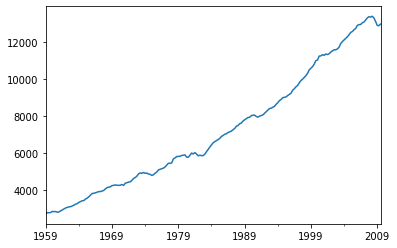

In [6]:
df['realgdp'].plot()

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [10]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp, Length: 203, dtype: float64

In [11]:
type(gdp_trend)

pandas.core.series.Series

In [13]:
df['trend'] = gdp_trend

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


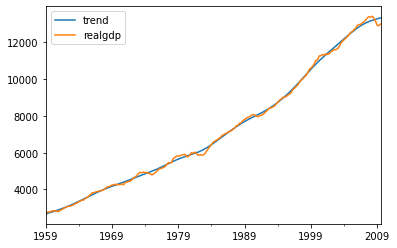

In [15]:
df[['trend','realgdp']].plot()

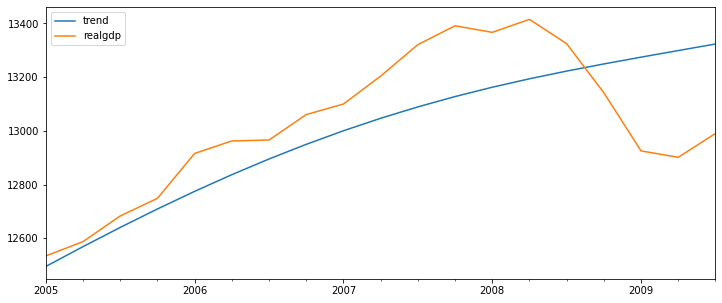

In [16]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [33]:
data = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)

In [34]:
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [35]:
data = data.dropna()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


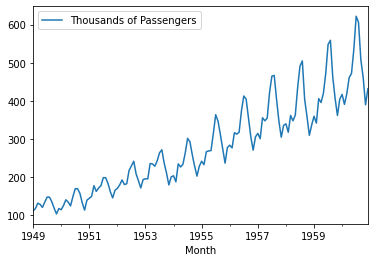

In [37]:
data.plot();

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
result = seasonal_decompose(data['Thousands of Passengers'],model='multiplicative')# multiplicative for non-linear kind of trend and additive for linear trend


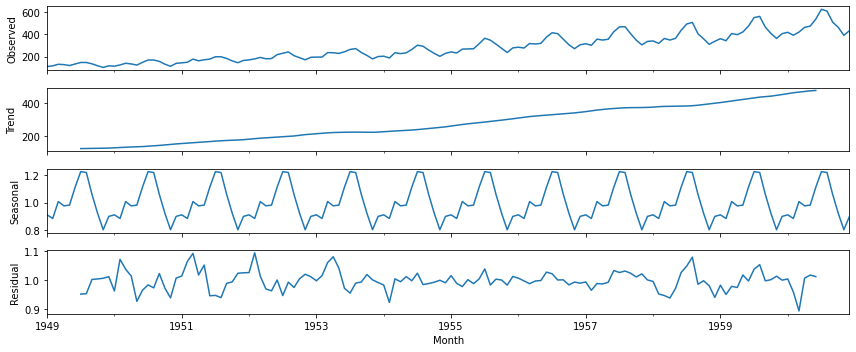

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();